<H1> Image Processing Basics and Camera Calibration </H1>


Accessing and displaying images

In [199]:


import cv2
import matplotlib.pyplot as plt
import numpy as np
import glob
import pickle
%matplotlib inline


def show(image, imgtxt = "Image"):
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(imgtxt)
    plt.show()

#### CV2 for historical reasons stores images in BGR format. So we need to convert the channel from BGR to RGB. The other models usually use the RGB channel only

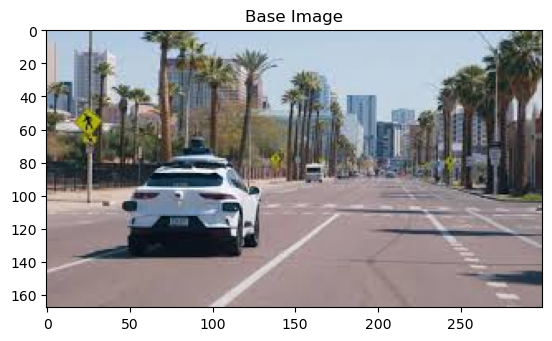

array([[[220, 197, 175],
        [220, 197, 175],
        [221, 197, 173],
        ...,
        [142, 149, 144],
        [120, 127, 120],
        [ 71,  78,  71]],

       [[220, 196, 176],
        [220, 197, 175],
        [220, 197, 175],
        ...,
        [ 88,  95,  90],
        [ 84,  92,  85],
        [110, 118, 111]],

       [[219, 197, 179],
        [219, 198, 177],
        [221, 197, 177],
        ...,
        [113, 123, 117],
        [101, 111, 105],
        [104, 114, 108]],

       ...,

       [[130, 131, 151],
        [130, 131, 151],
        [131, 132, 152],
        ...,
        [139, 137, 156],
        [139, 137, 156],
        [139, 137, 156]],

       [[130, 131, 151],
        [130, 131, 151],
        [131, 132, 152],
        ...,
        [135, 133, 152],
        [135, 133, 152],
        [135, 133, 152]],

       [[130, 131, 151],
        [130, 131, 151],
        [131, 132, 152],
        ...,
        [133, 131, 150],
        [133, 131, 150],
        [133, 131, 150]]

In [200]:
img = cv2.imread("./images/selfdriving.jpg")
show(img, "Base Image")
img

Perform Basic operations (Crop, Resize, Rotate, Flip)

In [201]:
img.shape

(168, 300, 3)

In [202]:
img.dtype

dtype('uint8')

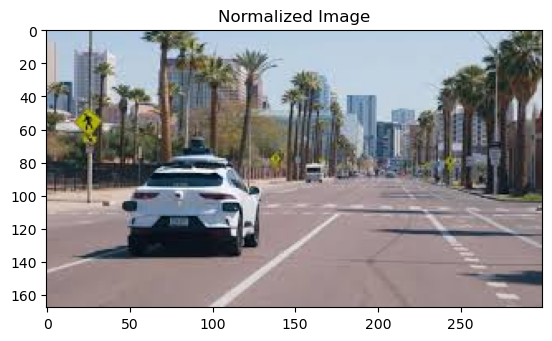

array([[[0.8627451 , 0.77254903, 0.6862745 ],
        [0.8627451 , 0.77254903, 0.6862745 ],
        [0.8666667 , 0.77254903, 0.6784314 ],
        ...,
        [0.5568628 , 0.58431375, 0.5647059 ],
        [0.47058824, 0.49803922, 0.47058824],
        [0.2784314 , 0.30588236, 0.2784314 ]],

       [[0.8627451 , 0.76862746, 0.6901961 ],
        [0.8627451 , 0.77254903, 0.6862745 ],
        [0.8627451 , 0.77254903, 0.6862745 ],
        ...,
        [0.34509805, 0.37254903, 0.3529412 ],
        [0.32941177, 0.36078432, 0.33333334],
        [0.43137255, 0.4627451 , 0.43529412]],

       [[0.85882354, 0.77254903, 0.7019608 ],
        [0.85882354, 0.7764706 , 0.69411767],
        [0.8666667 , 0.77254903, 0.69411767],
        ...,
        [0.44313726, 0.48235294, 0.45882353],
        [0.39607844, 0.43529412, 0.4117647 ],
        [0.40784314, 0.44705883, 0.42352942]],

       ...,

       [[0.50980395, 0.5137255 , 0.5921569 ],
        [0.50980395, 0.5137255 , 0.5921569 ],
        [0.5137255 , 0

In [203]:
img = img.astype(np.float32)
img = img/255
show(img, "Normalized Image")
img

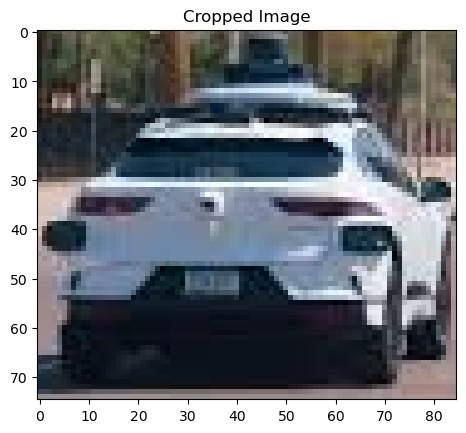

In [204]:
cropped_img = img[65:140, 45:130]
show(cropped_img,"Cropped Image")

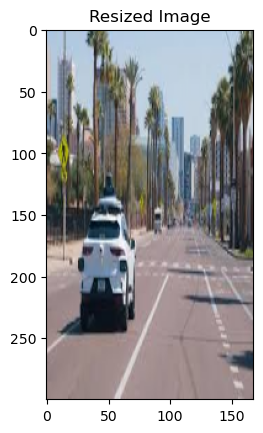

(300, 168, 3)

In [205]:
height,width,_ = img.shape
resized_img = cv2.resize(img, (height, width))
show(resized_img,"Resized Image")
resized_img.shape

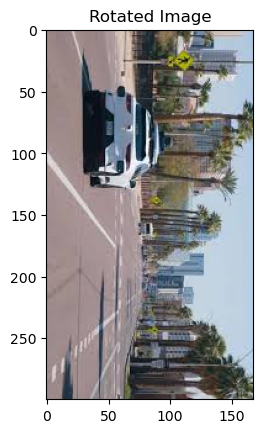

In [206]:
rotated_img = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
show(rotated_img,"Rotated Image")


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


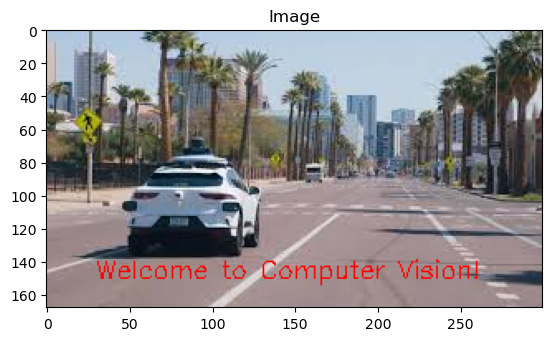

In [207]:
#PutText 
text = "Welcome to Computer Vision!"
text_img = cv2.putText(img, text, (30, 150), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,2550), 1, cv2.LINE_AA)
cv2.imwrite("./images/Sample_PutText.png", text_img) 
show(text_img)

(512, 512)


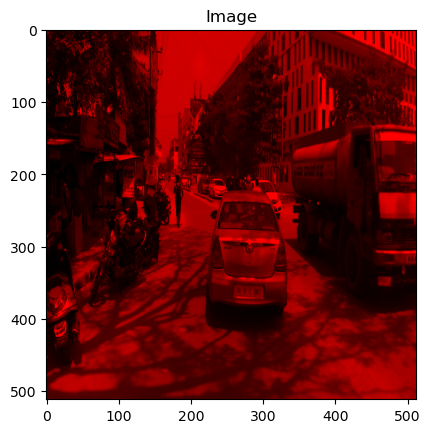

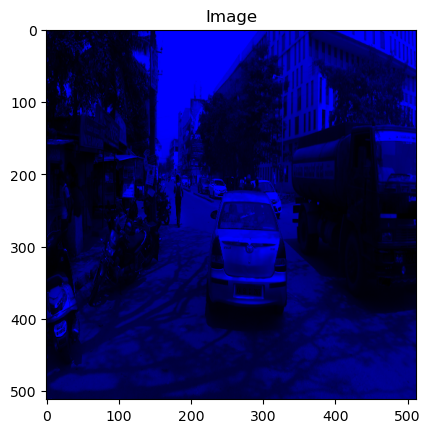

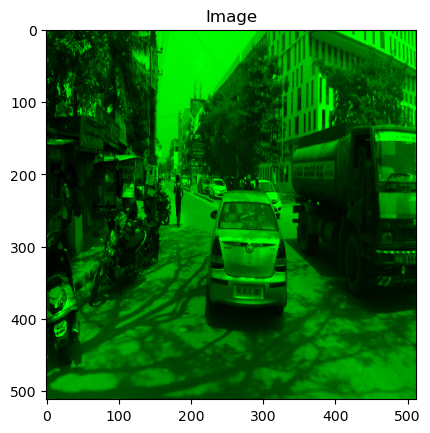

In [208]:
#Channel Split
img = cv2.imread("./images/Image_102.png")
blue, green, red = cv2.split(img)
print(red.shape)
zeros = np.zeros(blue.shape, np.uint8)
blueBGR = cv2.merge([blue,zeros,zeros])
greenBGR = cv2.merge([zeros,green,zeros])
redBGR = cv2.merge([zeros,zeros,red])
cv2.imwrite("./images/Sample_Blue.png", blueBGR) 
cv2.imwrite("./images/Sample_Red.png", redBGR) 
cv2.imwrite("./images/Sample_Green.png", greenBGR) 
show(redBGR)
show(blueBGR)
show(greenBGR)

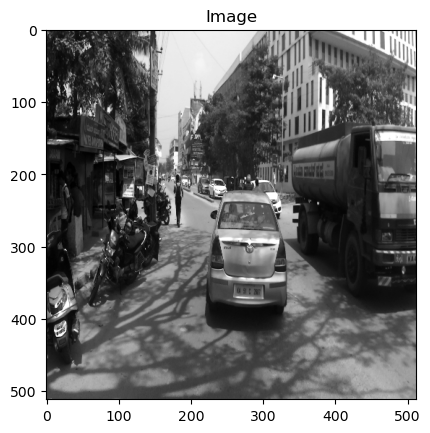

(512, 512)

In [209]:
#Grayscale

gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
show(gray_img)
cv2.imwrite("./images/Sample_Grayscale.png", gray_img) 
gray_img.shape

Create Geometric Primitives (Point, Line, Circle, Rectangle, Polygon)


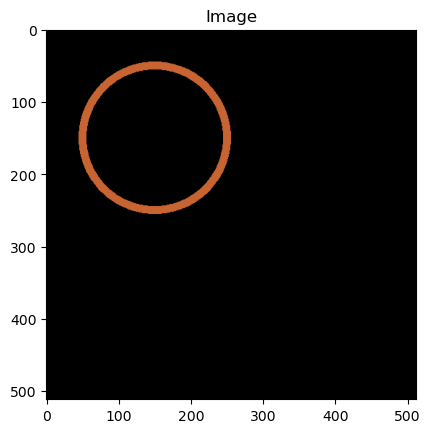

In [210]:
blnk_img = np.zeros((512, 512, 3), np.uint8)

cv2.circle(blnk_img, (150, 150), 100, (50,100,200), 10)
show(blnk_img)

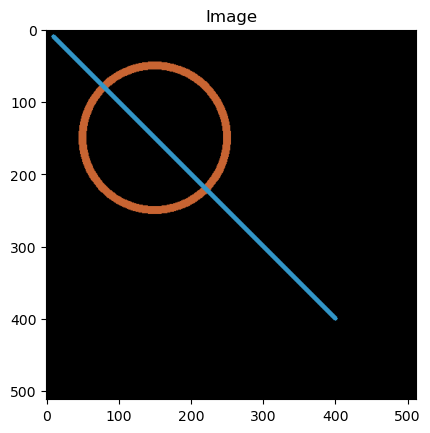

In [211]:
cv2.line(blnk_img, (10, 10), (400, 400), (200,150,50), 5)
show(blnk_img)

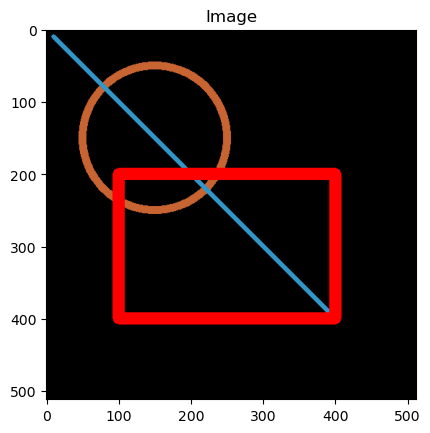

In [212]:
cv2.rectangle(blnk_img, (100, 200), (400, 400), (0,0,255), 15)
show(blnk_img)

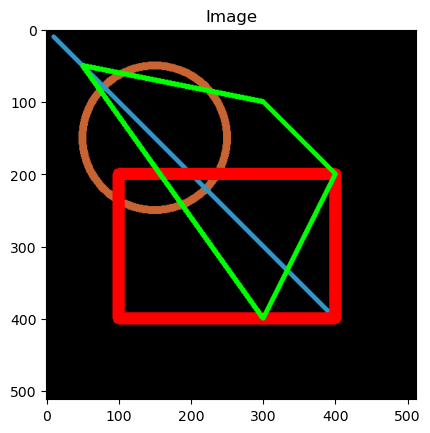

True

In [213]:
points = [(50, 50), (300, 100), (400, 200), (300, 400)]
cv2.polylines(blnk_img, [np.array(points)], True, (0,255,0), 5)
show(blnk_img)
cv2.imwrite("./images/Sample_Geometry.png", blnk_img) 

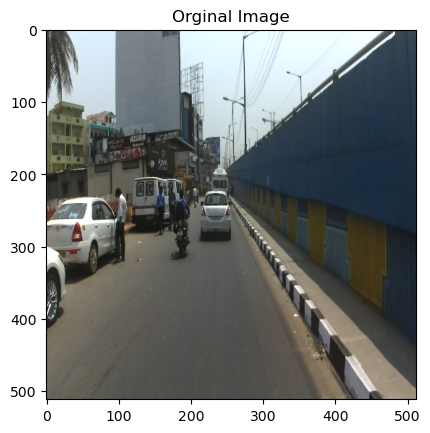

In [214]:

src_img = cv2.imread("./images/Image_121.png")
show(src_img,"Orginal Image")
rows,cols,_ = src_img.shape
center = ((cols-1)/2.0,(rows-1)/2.0)

Perform Geometric transformations (Projective, Euclidean, Similarity, Perspective, Affine, Reflection, Translation )


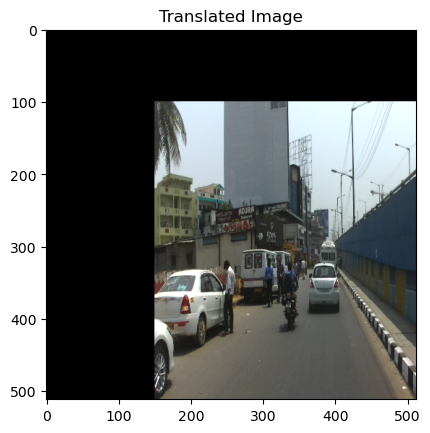

In [215]:
# Translation

width = cols
height = rows
dx = 150
dy = 100

x_shift, y_shift = dx, dy
M = np.float32([[1, 0, x_shift], [0, 1, y_shift]])
translated_img = cv2.warpAffine(src_img, M, (width, height))
show(translated_img, "Translated Image")

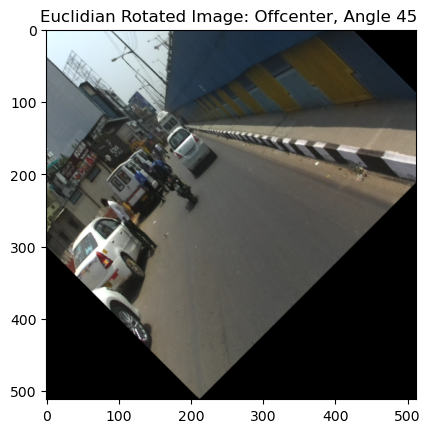

In [216]:
#Euclidean
center = ((cols-300)/2.0,(rows-1)/2.0)

angle = 45
scale = 1

M = cv2.getRotationMatrix2D(center, angle, scale)
transformed_img = cv2.warpAffine(src_img,M,(cols,rows))
show(transformed_img,"Euclidian Rotated Image: Offcenter, Angle 45 ")

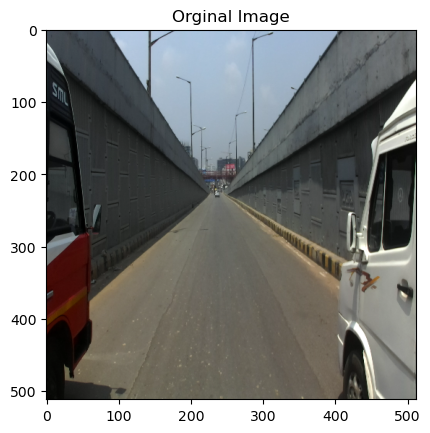

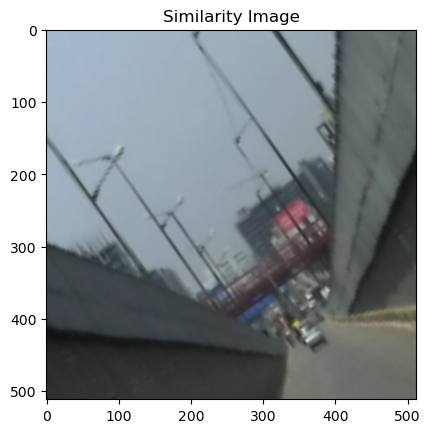

In [217]:
#Similairty

src_img = cv2.imread('./images/Image_126.png')

show(src_img,"Orginal Image")

rows,cols,ch = img.shape
center = ((cols-10)/2.0,(rows-200)/2.0)

angle = 35
scale = 4

M = cv2.getRotationMatrix2D(center, angle, scale)
transformed_img = cv2.warpAffine(src_img, M, (cols, rows))

show(transformed_img,"Similarity Image")

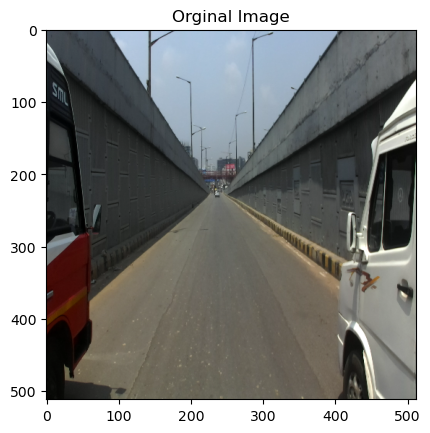

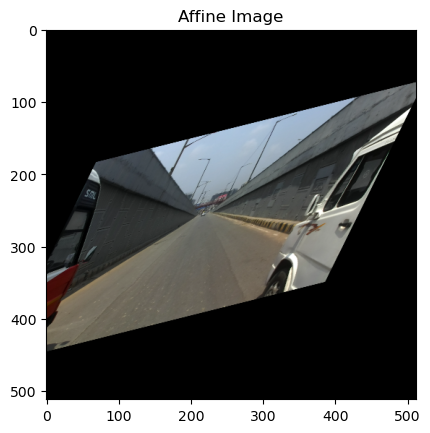

In [218]:
#Affine

src_img = cv2.imread('./images/Image_126.png')
src_points = np.float32([[50,50],[500,50],[100,400]])

show(src_img,"Orginal Image")

rows,cols,ch = img.shape
dst_points = np.float32([[100,200],[500,100],[50,380]])

M = cv2.getAffineTransform(src_points, dst_points)
transformed_img = cv2.warpAffine(src_img, M, (cols, rows))

show(transformed_img,"Affine Image")

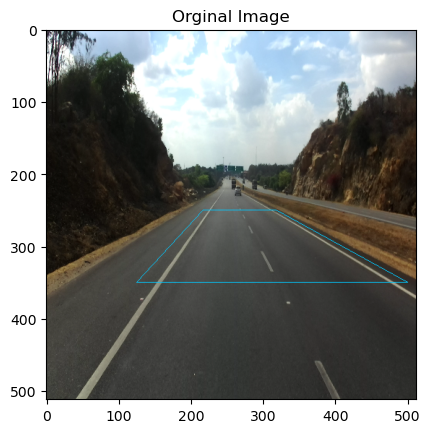

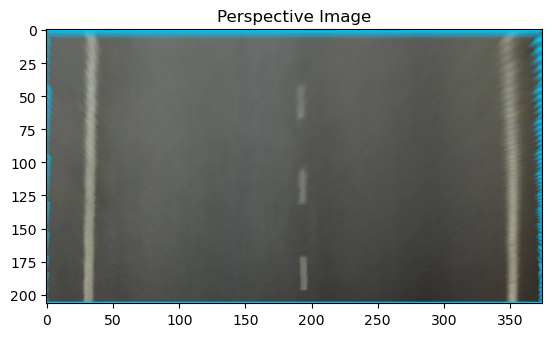

In [219]:
#Perspective / Projective

# All points are in format [cols, rows]
pt_A = [217,250]
pt_B = [125,350]
pt_C = [500,350]
pt_D = [318,250]

src_img = cv2.imread("./images/Image_323.png")
points = [(pt_A[0],pt_A[1]), (pt_B[0],pt_B[1]), (pt_C[0],pt_C[1]), (pt_D[0],pt_D[1])]
cv2.polylines(src_img, [np.array(points)], True, (255, 200, 0), thickness=1, lineType=cv2.LINE_8)
show(src_img,"Orginal Image")
              
width_AD = np.sqrt(((pt_A[0] - pt_D[0]) ** 2) + ((pt_A[1] - pt_D[1]) ** 2))
width_BC = np.sqrt(((pt_B[0] - pt_C[0]) ** 2) + ((pt_B[1] - pt_C[1]) ** 2))
maxWidth = max(int(width_AD), int(width_BC))


height_AB = np.sqrt(((pt_A[0] - pt_B[0]) ** 2) + ((pt_A[1] - pt_B[1]) ** 2))
height_CD = np.sqrt(((pt_C[0] - pt_D[0]) ** 2) + ((pt_C[1] - pt_D[1]) ** 2))
maxHeight = max(int(height_AB), int(height_CD))


src_points = np.float32([pt_A, pt_B, pt_C, pt_D])
dst_points = np.float32([[0, 0],
                        [0, maxHeight - 1],
                        [maxWidth - 1, maxHeight - 1],
                        [maxWidth - 1, 0]])

M = cv2.getPerspectiveTransform(src_points, dst_points)
transformed_img = cv2.warpPerspective(src_img, M, (maxWidth, maxHeight))
show(transformed_img,"Perspective Image")

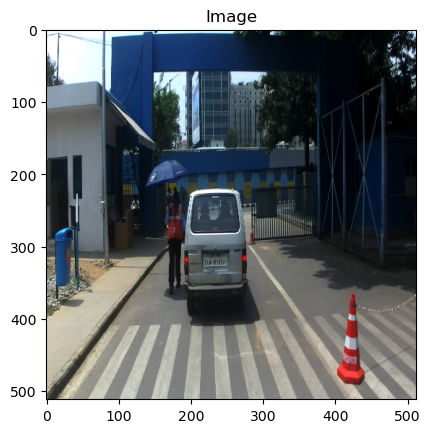

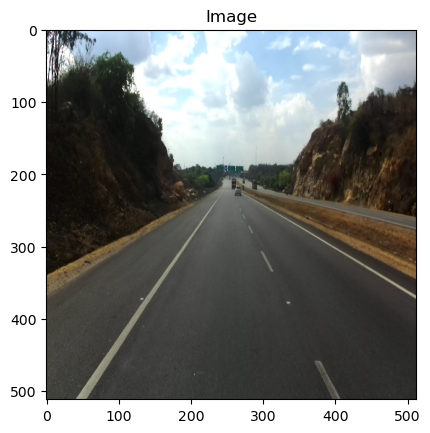

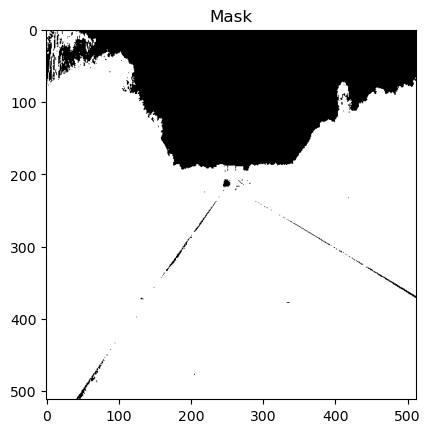

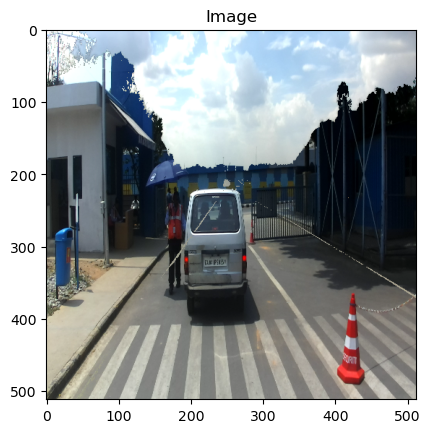

In [220]:
# Image Arithmetic : Add images 
#Load two images
img1 = cv2.imread('./images/Image_151.png')
img2 = cv2.imread('./images/Image_323.png')
show(img1)
show(img2)
rows,cols,channels = img2.shape
roi = img1[0:rows, 0:cols]
# Now create a mask of logo and create its inverse mask also
img2gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
ret, mask = cv2.threshold(img2gray, 150, 255, cv2.THRESH_BINARY)
mask_inv = cv2.bitwise_not(mask)
show(mask_inv,"Mask")
# Now black-out the area of logo in ROI
img1_bg = cv2.bitwise_and(roi,roi,mask = mask_inv)
# Take only region of logo from logo image.
img2_fg = cv2.bitwise_and(img2,img2,mask = mask)
# Put logo in ROI and modify the main image
dst = cv2.add(img1_bg,img2_fg)
img1[0:rows, 0:cols ] = dst
show(dst)


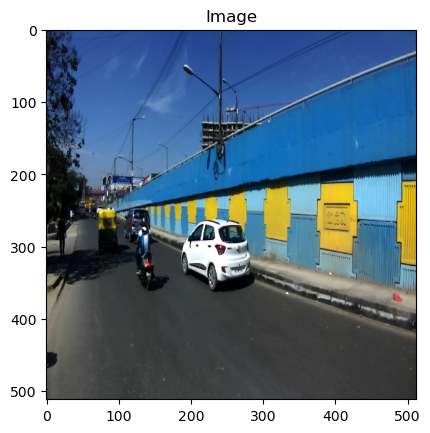

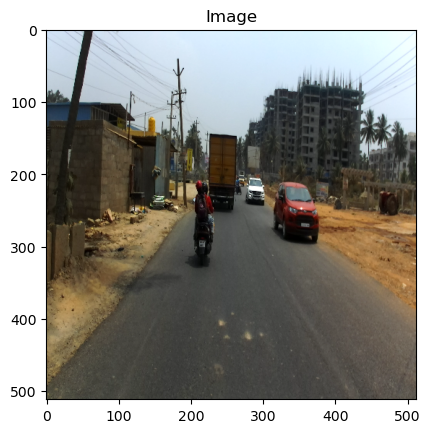

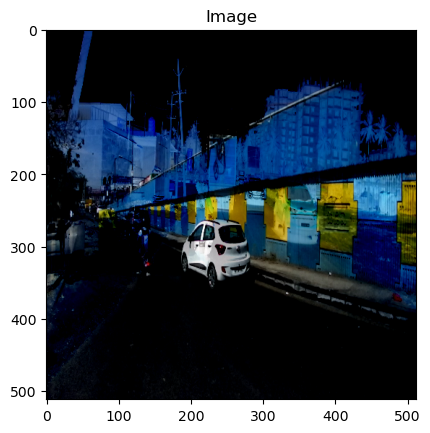

In [221]:

img1 = cv2.imread('./images/Image_492.png')
img2 = cv2.imread('./images/Image_75.png')
sub = cv2.subtract(img1, img2)
show(img1)
show(img2)
show(sub)

In [222]:
# Camera Calibration

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6*8,3), np.float32)
objp[:,:2] = np.mgrid[0:8, 0:6].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.

# Make a list of calibration images
images = glob.glob('./images/GO*.jpg')

# Step through the list and search for chessboard corners
for idx, fname in enumerate(images):
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (8,6), None)

    # If found, add object points, image points
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)

        # Draw and display the corners
        cv2.drawChessboardCorners(img, (8,6), corners, ret)
        #write_name = 'corners_found'+str(idx)+'.jpg'
        #cv2.imwrite(write_name, img)
        cv2.imshow('img', img)
        cv2.waitKey(500)

cv2.destroyAllWindows()

Text(0.5, 1.0, 'Undistorted Image')

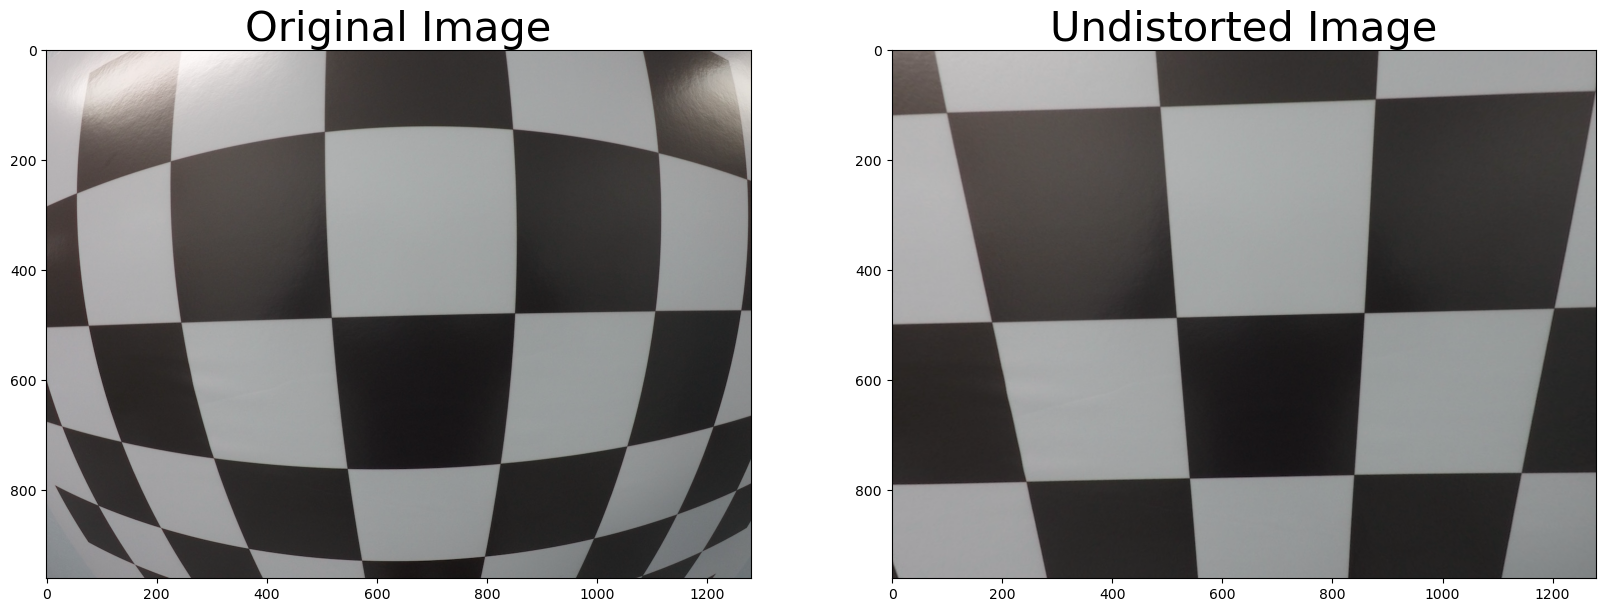

In [223]:

# Test undistortion on an image
img = cv2.imread('./images/test_image.jpg')
img_size = (img.shape[1], img.shape[0])

# Do camera calibration given object points and image points
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size,None,None)


dst = cv2.undistort(img, mtx, dist, None, mtx)
cv2.imwrite('./images/test_undist.jpg',dst)

# Save the camera calibration result for later use (we won't worry about rvecs / tvecs)
dist_pickle = {}
dist_pickle["mtx"] = mtx
dist_pickle["dist"] = dist
pickle.dump( dist_pickle, open( "./images/wide_dist_pickle.p", "wb" ) )
#dst = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)
# Visualize undistortion
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(dst)
ax2.set_title('Undistorted Image', fontsize=30)

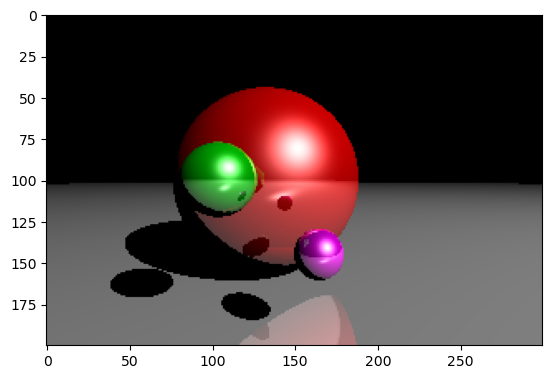

In [224]:
# Photometric image formation
def normalize(vector):
    return vector / np.linalg.norm(vector)

def reflected(vector, axis):
    return vector - 2 * np.dot(vector, axis) * axis

def sphere_intersect(center, radius, ray_origin, ray_direction):
    b = 2 * np.dot(ray_direction, ray_origin - center)
    c = np.linalg.norm(ray_origin - center) ** 2 - radius ** 2
    delta = b ** 2 - 4 * c
    if delta > 0:
        t1 = (-b + np.sqrt(delta)) / 2
        t2 = (-b - np.sqrt(delta)) / 2
        if t1 > 0 and t2 > 0:
            return min(t1, t2)
    return None

def nearest_intersected_object(objects, ray_origin, ray_direction):
    distances = [sphere_intersect(obj['center'], obj['radius'], ray_origin, ray_direction) for obj in objects]
    nearest_object = None
    min_distance = np.inf
    for index, distance in enumerate(distances):
        if distance and distance < min_distance:
            min_distance = distance
            nearest_object = objects[index]
    return nearest_object, min_distance

width = 300
height = 200

max_depth = 3

camera = np.array([0, 0, 1])
ratio = float(width) / height
screen = (-1, 1 / ratio, 1, -1 / ratio) # left, top, right, bottom

light = { 'position': np.array([5, 5, 5]), 'ambient': np.array([1, 1, 1]), 'diffuse': np.array([1, 1, 1]), 'specular': np.array([1, 1, 1]) }

objects = [
    { 'center': np.array([-0.2, 0, -1]), 'radius': 0.7, 'ambient': np.array([0.1, 0, 0]), 'diffuse': np.array([0.7, 0, 0]), 'specular': np.array([1, 1, 1]), 'shininess': 100, 'reflection': 0.5 },
    { 'center': np.array([0.1, -0.3, 0]), 'radius': 0.1, 'ambient': np.array([0.1, 0, 0.1]), 'diffuse': np.array([0.7, 0, 0.7]), 'specular': np.array([1, 1, 1]), 'shininess': 100, 'reflection': 0.5 },
    { 'center': np.array([-0.3, 0, 0]), 'radius': 0.15, 'ambient': np.array([0, 0.1, 0]), 'diffuse': np.array([0, 0.6, 0]), 'specular': np.array([1, 1, 1]), 'shininess': 100, 'reflection': 0.5 },
    { 'center': np.array([0, -9000, 0]), 'radius': 9000 - 0.7, 'ambient': np.array([0.1, 0.1, 0.1]), 'diffuse': np.array([0.6, 0.6, 0.6]), 'specular': np.array([1, 1, 1]), 'shininess': 100, 'reflection': 0.5 }
]

image = np.zeros((height, width, 3))
for i, y in enumerate(np.linspace(screen[1], screen[3], height)):
    for j, x in enumerate(np.linspace(screen[0], screen[2], width)):
        # screen is on origin
        pixel = np.array([x, y, 0])
        origin = camera
        direction = normalize(pixel - origin)

        color = np.zeros((3))
        reflection = 1

        for k in range(max_depth):
            # check for intersections
            nearest_object, min_distance = nearest_intersected_object(objects, origin, direction)
            if nearest_object is None:
                break

            intersection = origin + min_distance * direction
            normal_to_surface = normalize(intersection - nearest_object['center'])
            shifted_point = intersection + 1e-5 * normal_to_surface
            intersection_to_light = normalize(light['position'] - shifted_point)

            _, min_distance = nearest_intersected_object(objects, shifted_point, intersection_to_light)
            intersection_to_light_distance = np.linalg.norm(light['position'] - intersection)
            is_shadowed = min_distance < intersection_to_light_distance

            if is_shadowed:
                break

            illumination = np.zeros((3))

            # ambiant
            illumination += nearest_object['ambient'] * light['ambient']

            # diffuse
            illumination += nearest_object['diffuse'] * light['diffuse'] * np.dot(intersection_to_light, normal_to_surface)

            # specular
            intersection_to_camera = normalize(camera - intersection)
            H = normalize(intersection_to_light + intersection_to_camera)
            illumination += nearest_object['specular'] * light['specular'] * np.dot(normal_to_surface, H) ** (nearest_object['shininess'] / 4)

            # reflection
            color += reflection * illumination
            reflection *= nearest_object['reflection']

            origin = shifted_point
            direction = reflected(direction, normal_to_surface)

        image[i, j] = np.clip(color, 0, 1)
    #print("%d/%d" % (i + 1, height))

plt.imsave('./images/light.png', image)
plt.imshow(image)
plt.show()

In [225]:
# Exercise : Choose an image with the sky/water. 
# Flip and Remove blue color from any image 